In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization,Rescaling

### LOADING IN THE DATA

In [24]:
batch_size = 32
img_height = 200
img_width = 200


In [25]:
data_dir= r"dataset/asl_alphabet_train/asl_alphabet_train"

#Splitting the dataset into training and validation dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 87000 files belonging to 29 classes.
Using 69600 files for training.


In [26]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


In [27]:
#Print class names
class_names = train_ds.class_names
print(len(class_names))

29


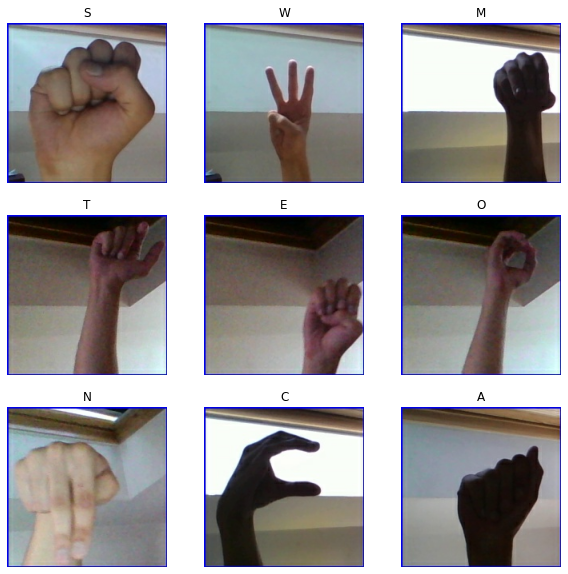

In [28]:
#Visualizing the data
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


### PREPROCESSING THE DATA

In [29]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [30]:
#Defining some preprocessing layers

#Defining the normalization layer
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(img_height, img_width),
  layers.Rescaling(1./255)
])


#Augmenting the data
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)


2022-01-05 14:47:07.364863: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


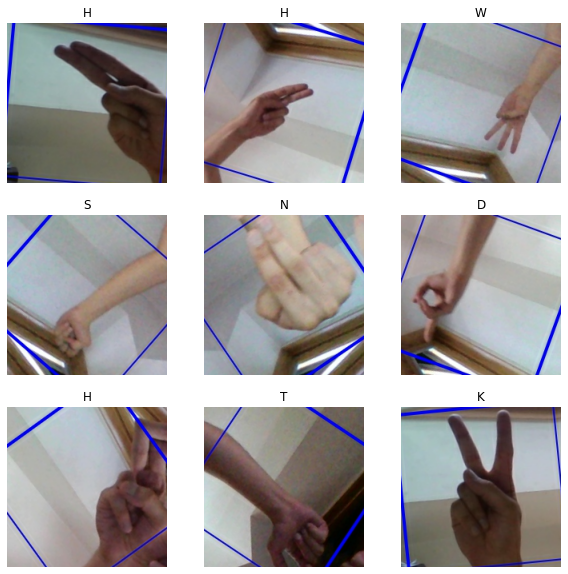

In [31]:
#Visualizing the data
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [36]:
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
     layers.MaxPooling2D((2,2)),
  layers.BatchNormalization(),
  layers.MaxPooling2D((2,2)),
  layers.BatchNormalization(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.BatchNormalization(),
  layers.Dropout(0.2),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.BatchNormalization(),
  
  layers.Conv2D(128, 3, padding='same', activation='relu'),
   layers.MaxPooling2D((2,2)),
  layers.BatchNormalization(),
    
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.BatchNormalization(),
  layers.Dropout(0.2),
    
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = 'softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_47 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 batch_normalization_49 (Bat  (None, 100, 100, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                     

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/Users/salvi/opt/anaconda3/envs/signla/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


 239/2175 [==>...........................] - ETA: 21:00 - loss: 3.3193 - accuracy: 0.0808

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined